In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [6]:
figure_num = 16**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([10, -75])
up = np.array([170, 75])
param_names = np.array(["inside_angle", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [7]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.0003854870212991363


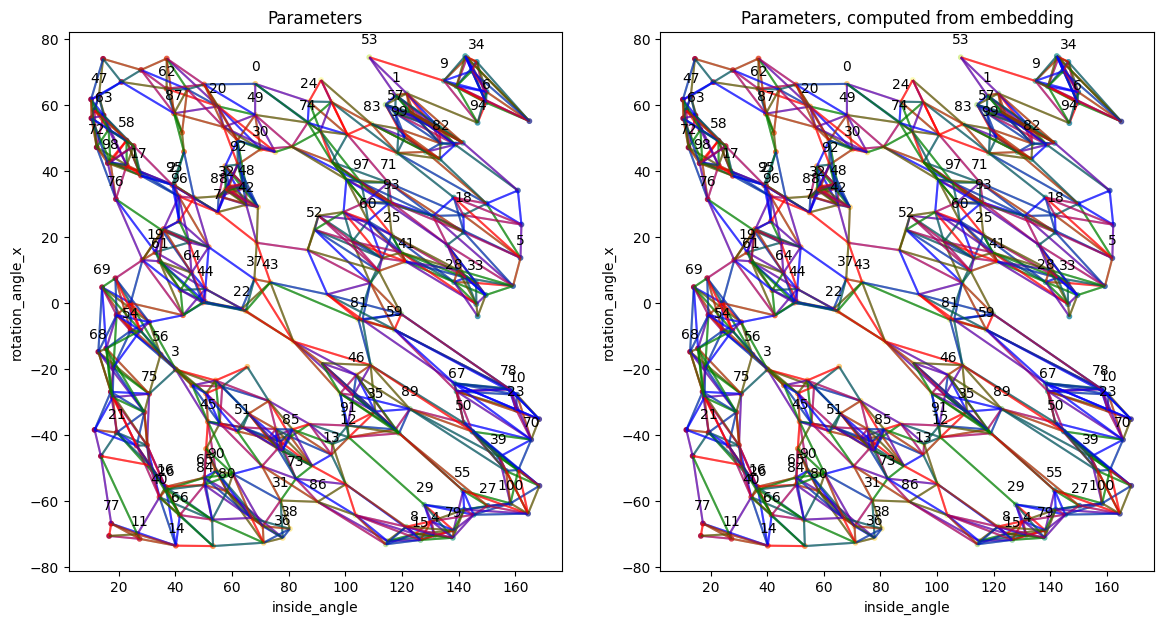

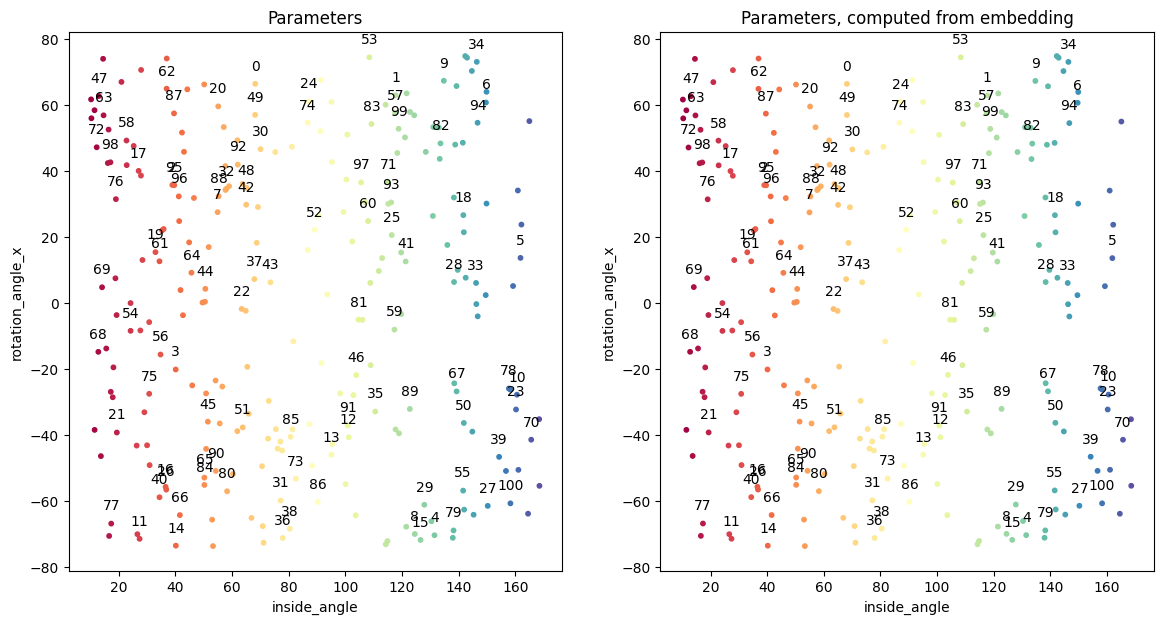

In [8]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [10]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level = 0, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 26.92166802 -61.42877579], x_err = 0.06292329056642185
x_real = [ 19.12339308 -73.57339899]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 26.87284692 -61.38788124], x_err = 0.06342989739787237
x_real = [ 15.80171116 -69.59397341]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 28.81993872 -62.53858004], x_err = 0.046674784637601295
x_real = [ 25.52112271 -73.29251361]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 28.7387413  -62.53013096], x_err = 0.04647551059220681
x_real = [ 22.17972251 -72.03033409]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 26.17780614 -59.93145128], x_err = 0.06398846078025792
x_real = [ 19.38715761 -61.16610526]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [ 24.65313339 -58.50937378], x_err = 0.07183535084262505
x_real = [ 17.19523917 -62.33919904]
Finding neighbors: 1 ms , optimization:

In [11]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level = 0, pieces_cnt=10, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [ 17.29990376 -66.8609308 ], x_err = 0.10947685064336571
x_real = [ 13.20079447 -62.56546073]
-----------
x_opt  = [ 17.29990376 -66.8609308 ], x_err = 0.10486406467571063
x_real = [ 19.71933151 -66.97653322]
-----------
x_opt  = [ 16.56412282 -70.59683407], x_err = 0.12396011443727595
x_real = [ 20.54971124 -74.00274861]
-----------
x_opt  = [ 16.56412282 -70.59683407], x_err = 0.12101579979019178
x_real = [ 14.91269267 -73.90823093]
-----------
x_opt  = [ 17.29990376 -66.8609308 ], x_err = 0.11025643264927615
x_real = [ 14.05868771 -61.7501794 ]
-----------
x_opt  = [ 17.29990376 -66.8609308 ], x_err = 0.1032044491988881
x_real = [ 16.4934857  -67.08085218]
-----------
x_opt  = [ 16.56412282 -70.59683407], x_err = 0.1229579525584681
x_real = [ 17.56081662 -73.05974326]
-----------
x_opt  = [ 26.53619557 -70.06042073], x_err = 0.06863897919495651
x_real = [ 24.74696083 -67.79436099]
-----------
x_opt  = [ 17.29990376 -66.8609308 ], x_err = 0.11403854389702589
x_re

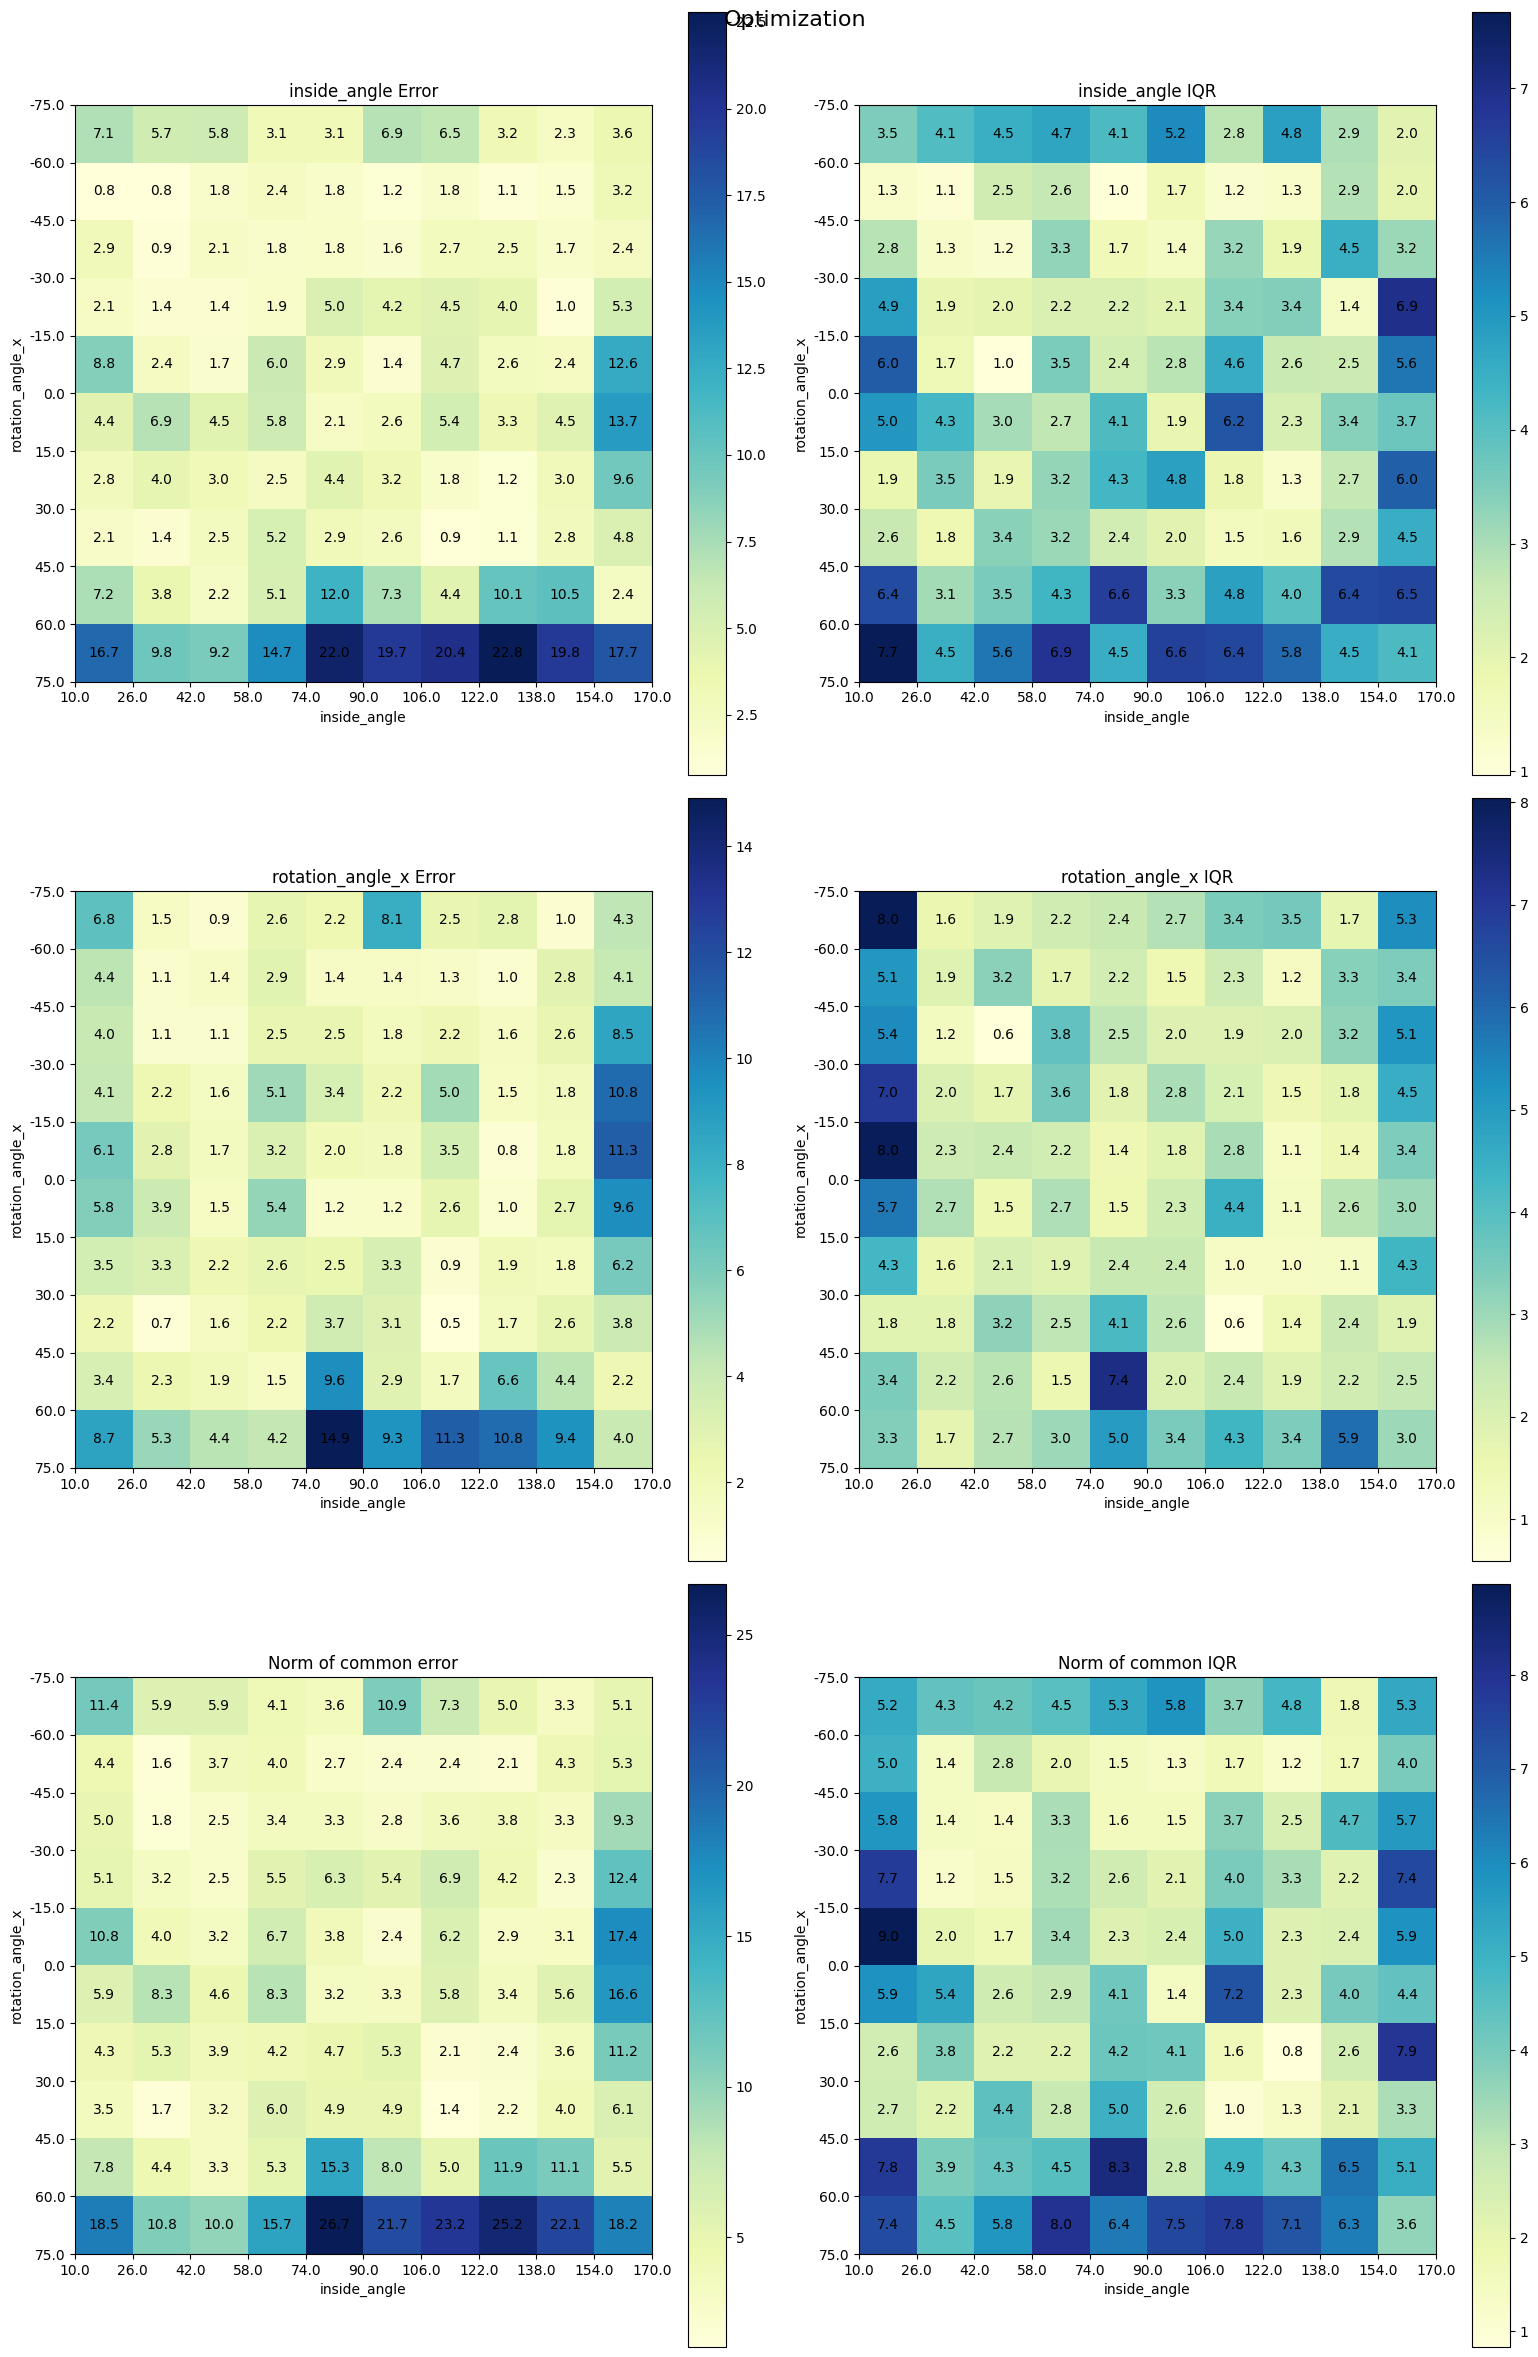

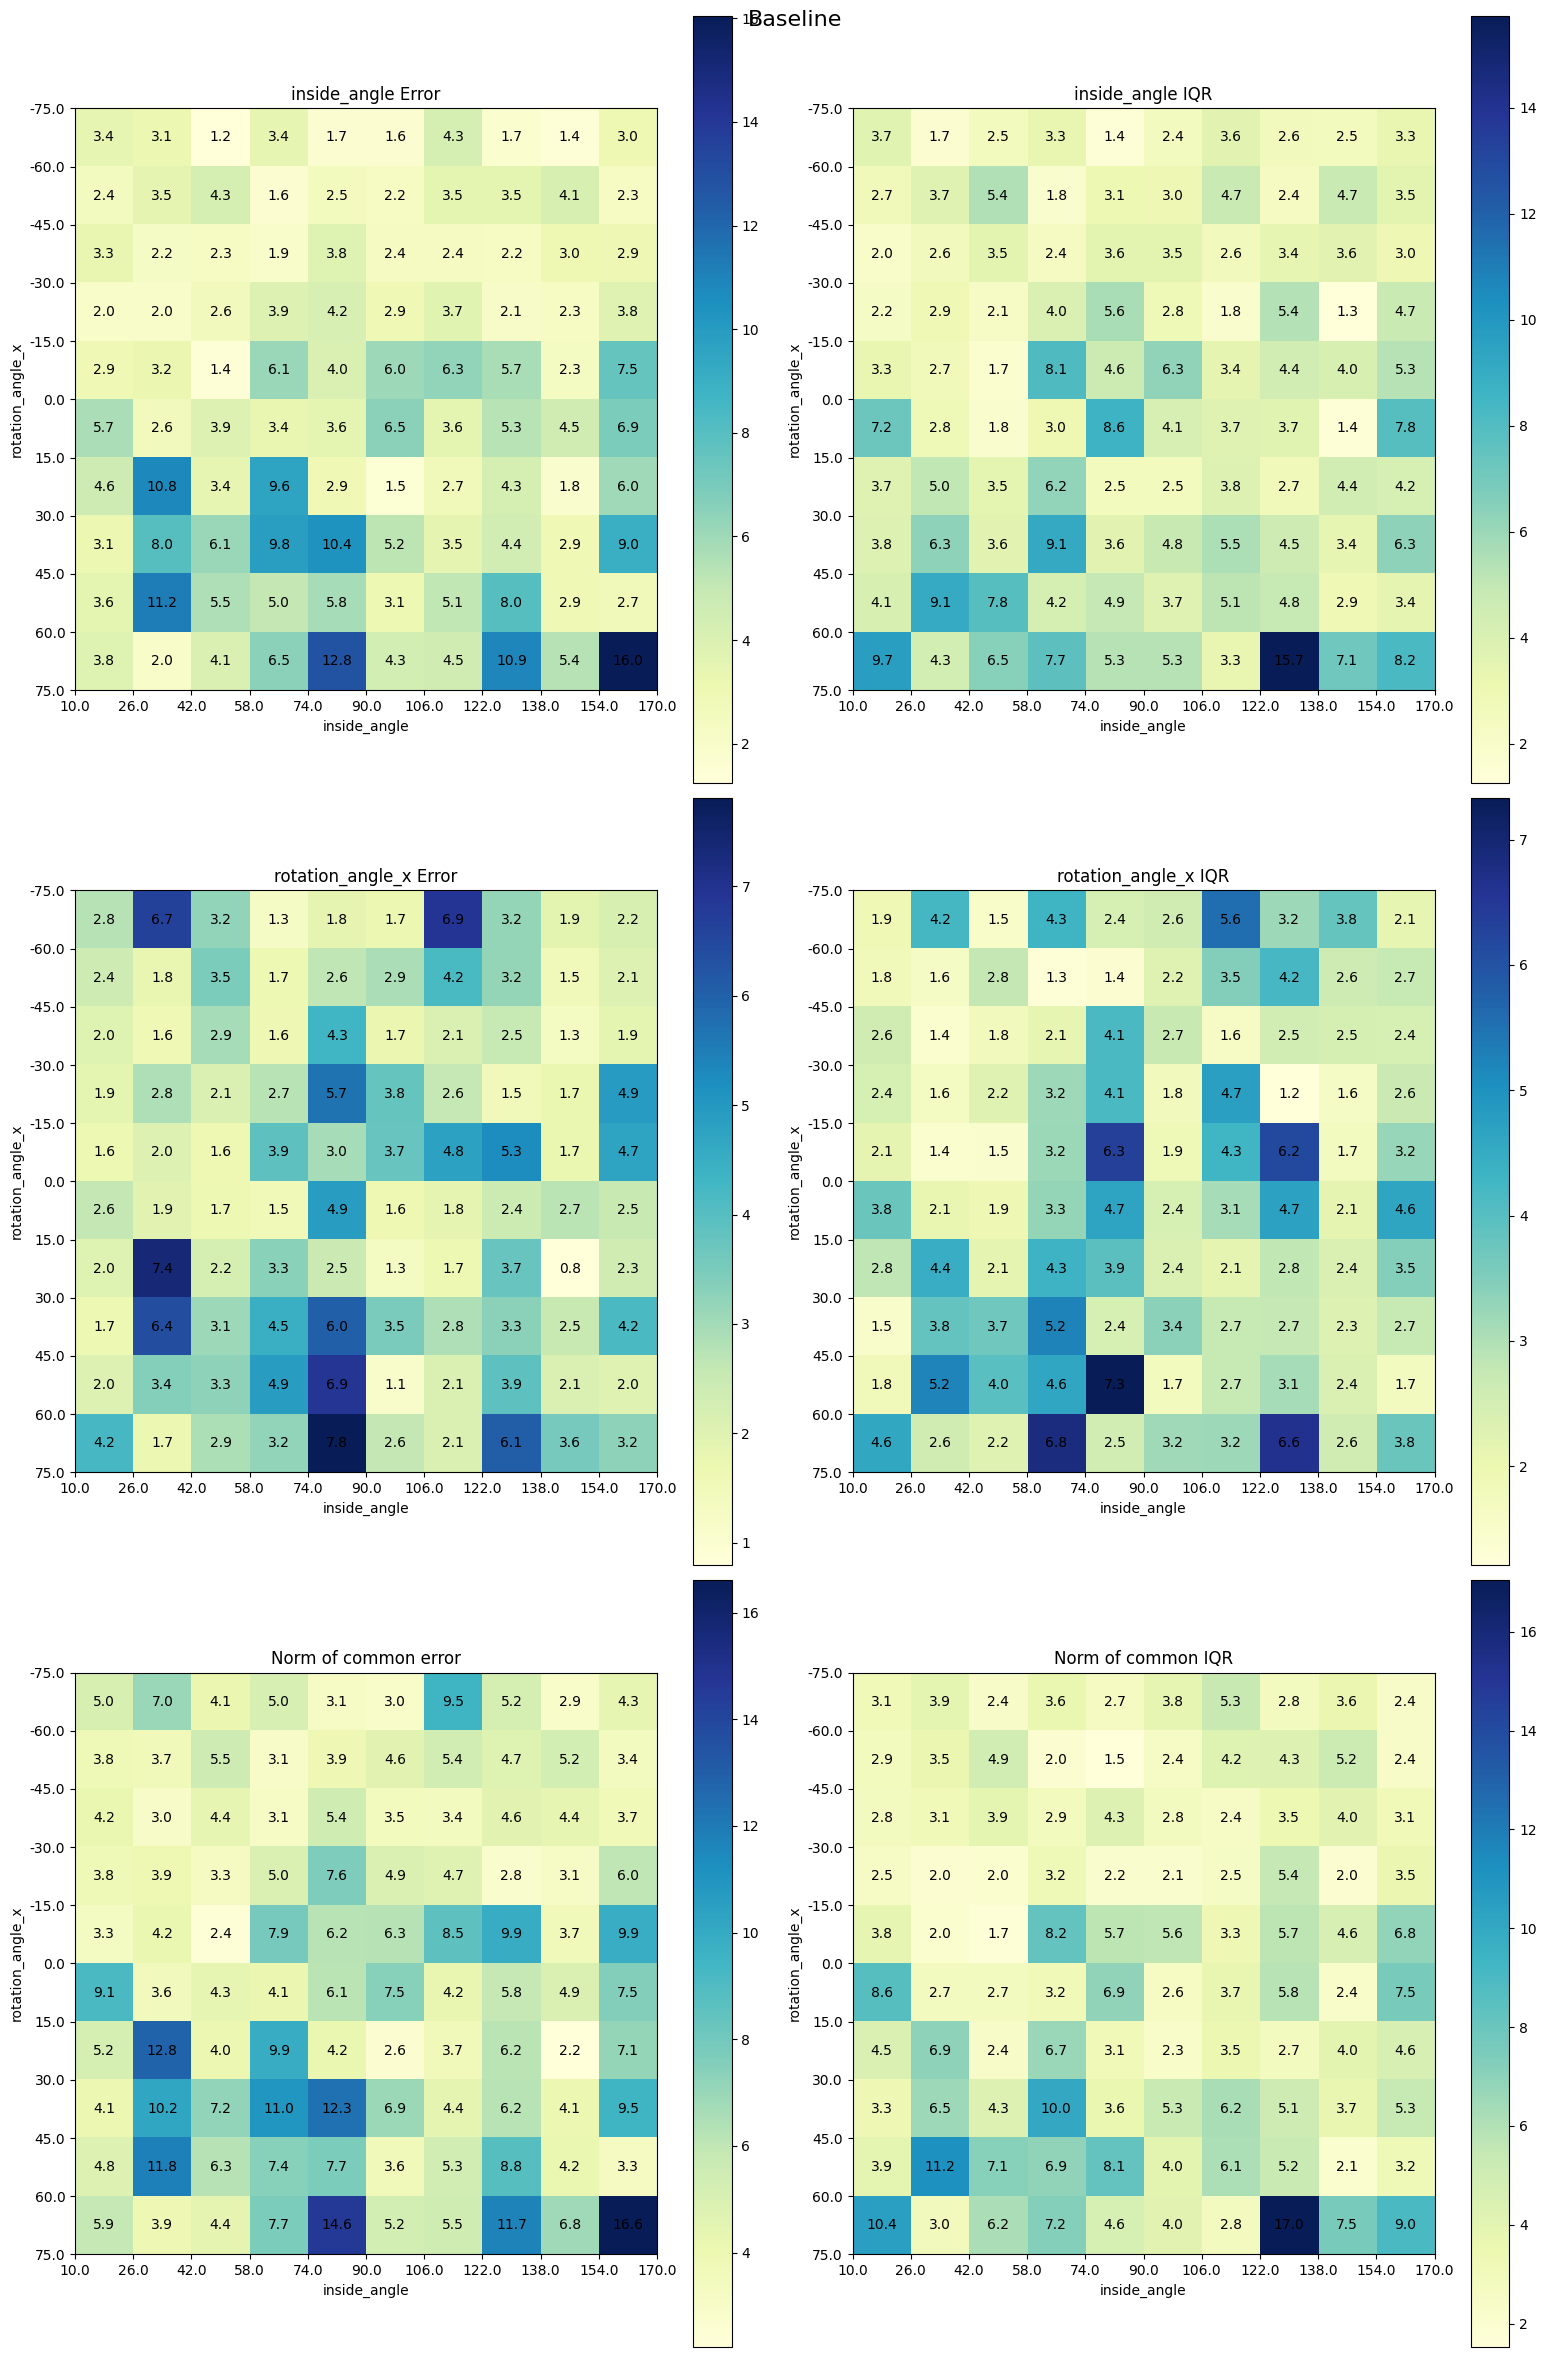

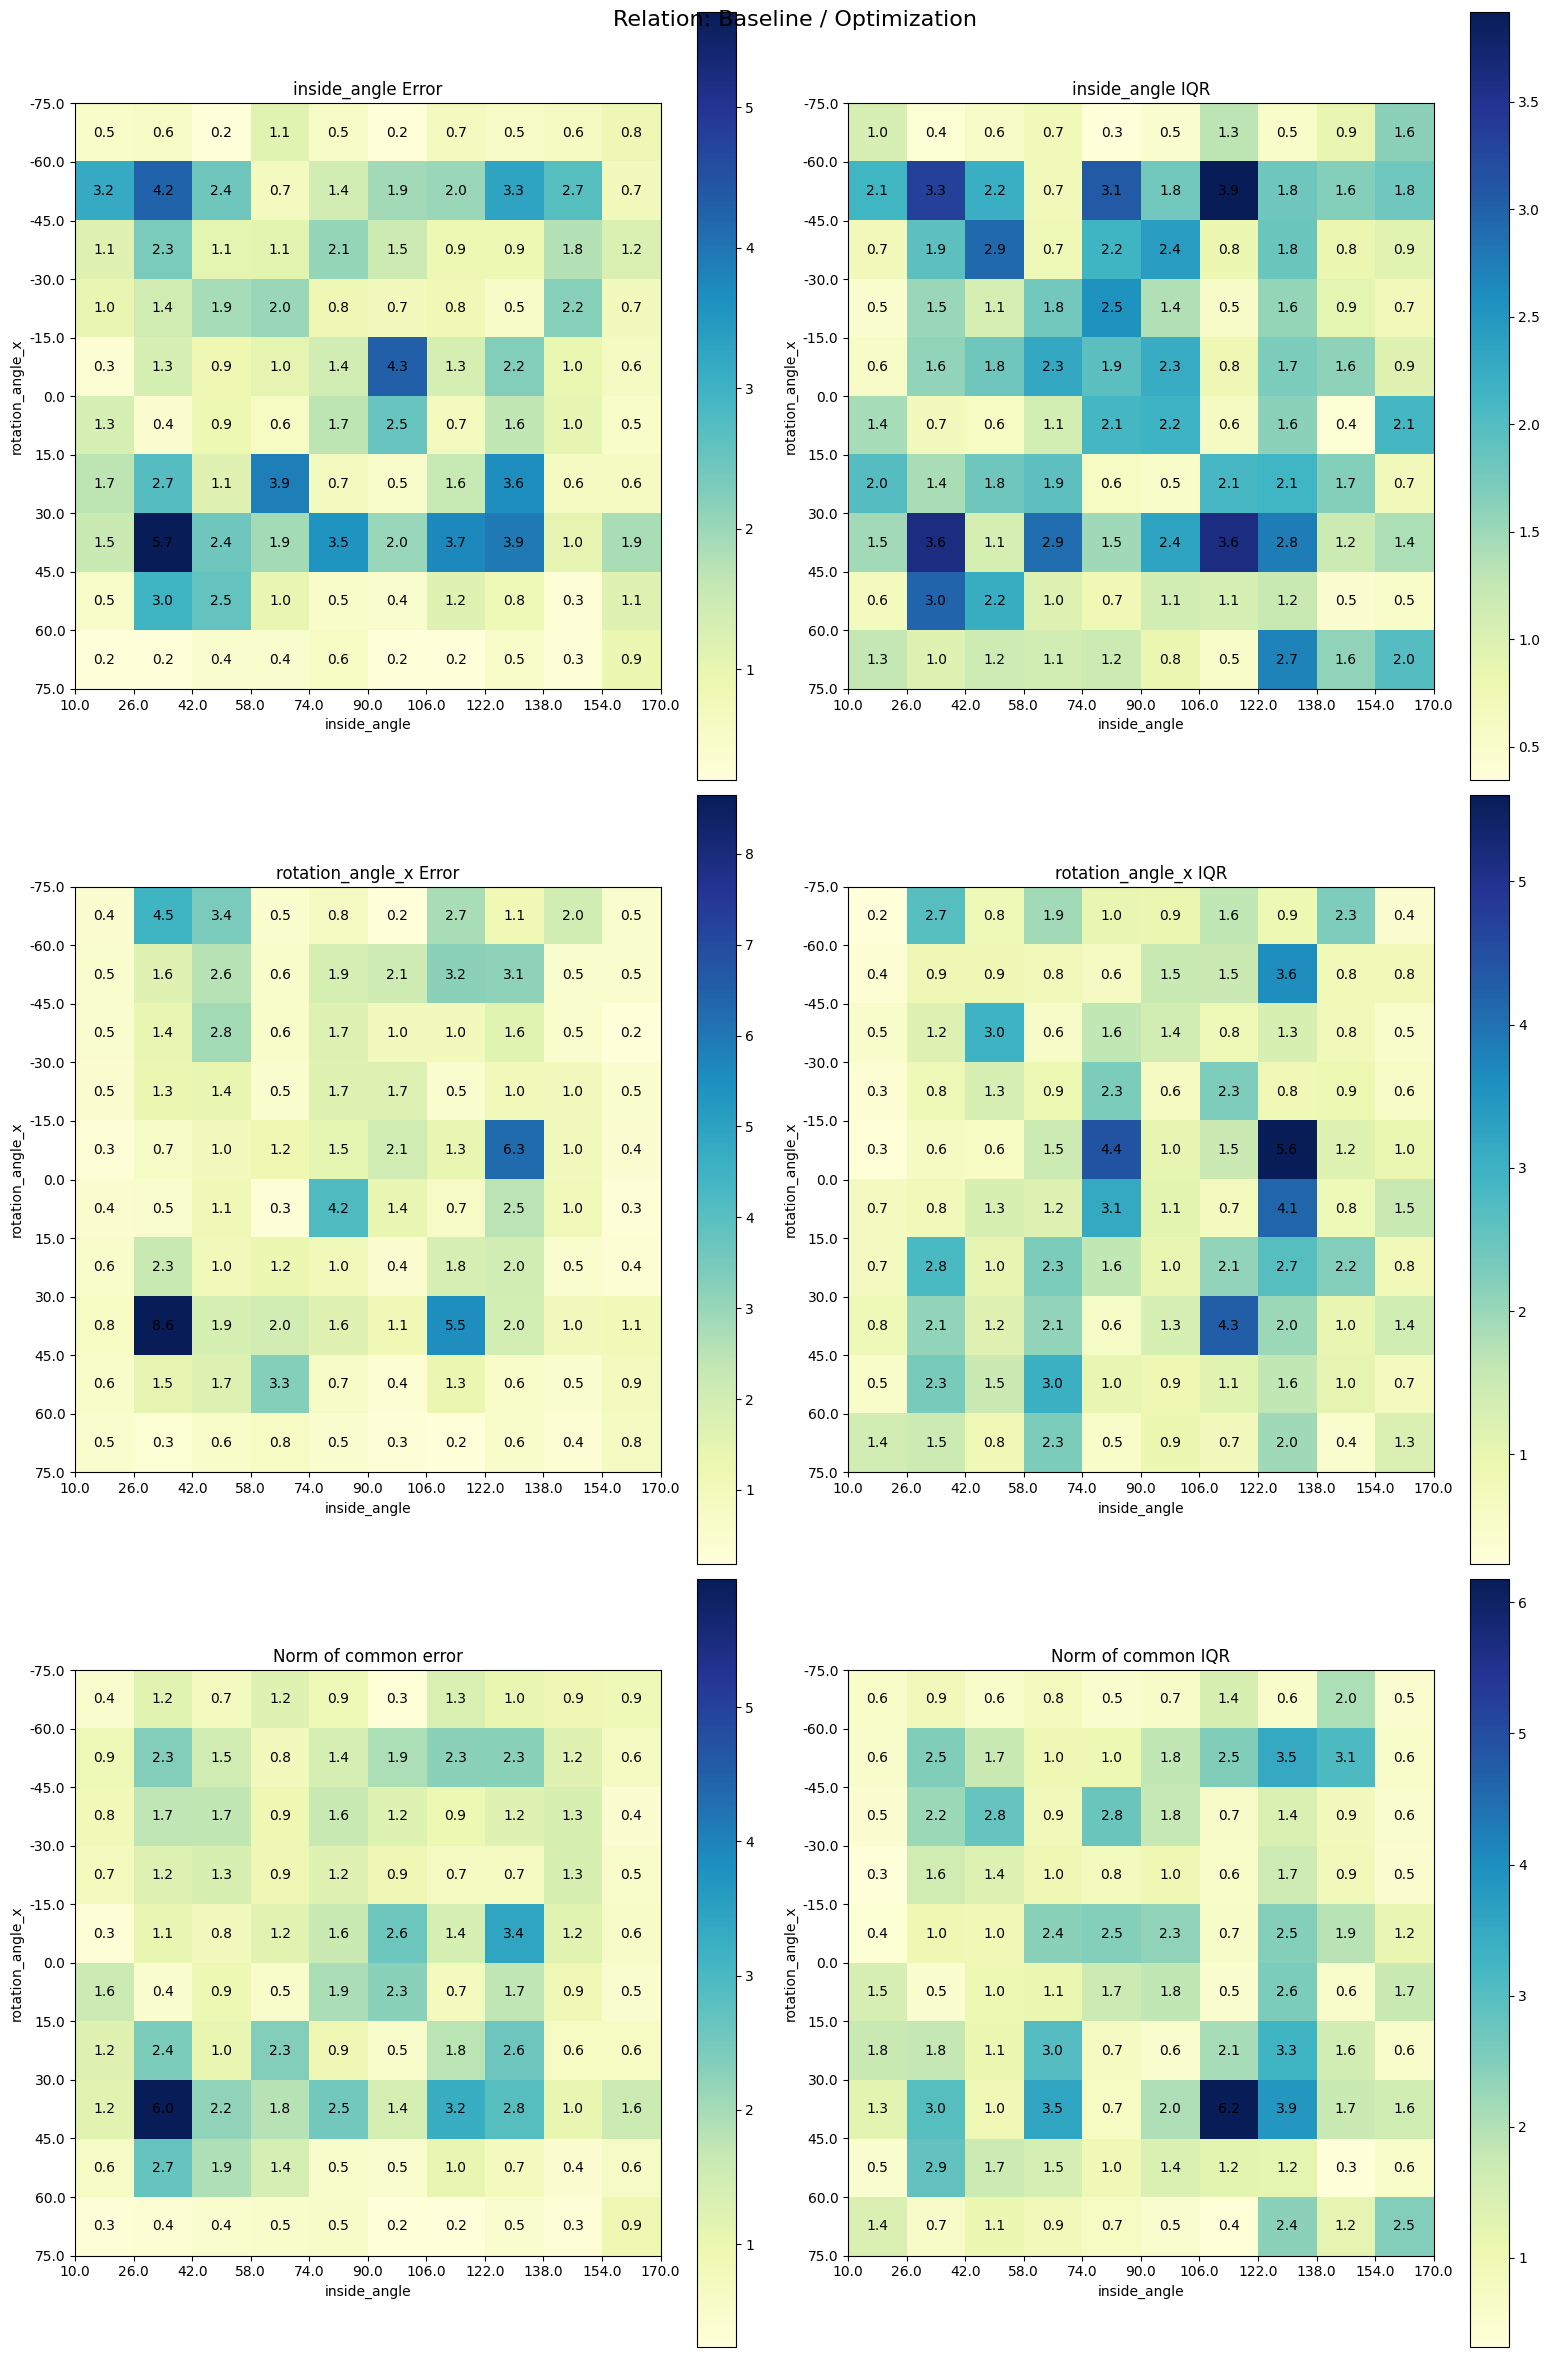

In [15]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_angle_2d.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_angle_2d_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_angle_2d_rel.png", title="Relation: Baseline / Optimization")

1.2464626853509628 166.57088600880147 -79.92407177206961 81.73250144148015


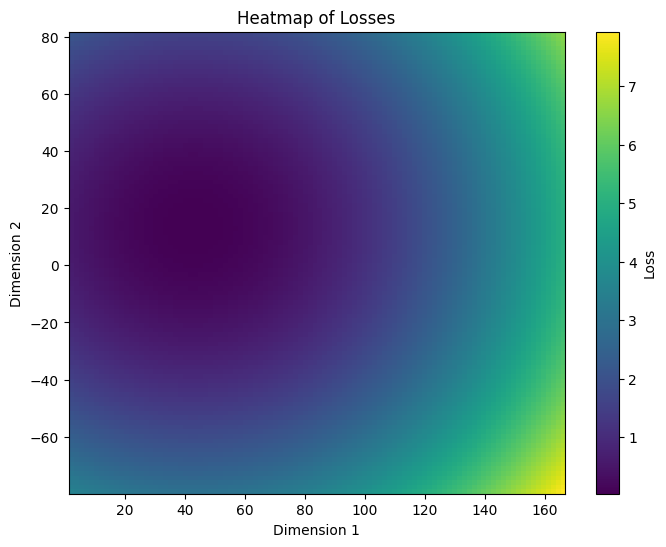

Finding neighbors: 3 ms , optimization: 177 ms
x_opt = [42.29023372 13.64596711], x_err = 0.0309901221354729
x_real = [45 15]
1.2464626853509628 166.57088600880147 -79.92407177206961 81.73250144148015


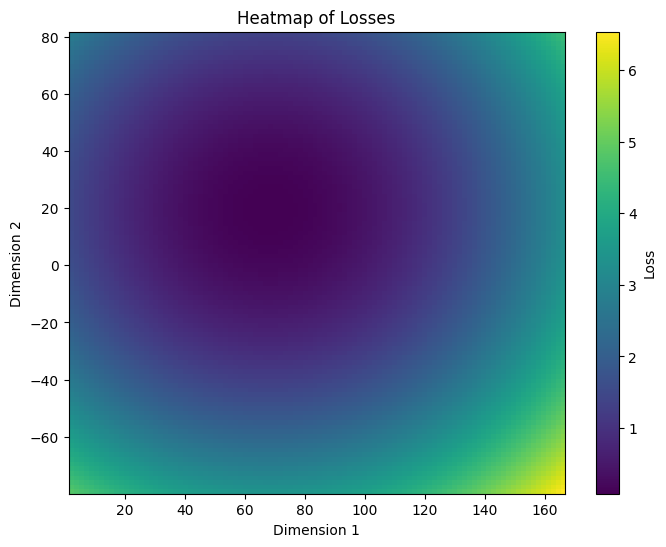

Finding neighbors: 1 ms , optimization: 174 ms
x_opt = [67.73632225 19.77423985], x_err = 0.07990031017997605
x_real = [70 15]


In [14]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")